<a href="https://www.kaggle.com/code/notsau/game-winrate-with-league-of-legends-data?scriptVersionId=161444789" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [4]:
import pandas as pd

pd.set_option("display.max_columns",None)

## EDA

In [2]:
df=pd.read_csv("games.csv")

In [5]:
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,2,8,12,4,432,3,4,96,4,7,11,11,6,112,4,14,11,1,2,3,0,92,40,69,119,141,104,11,4,498,4,7,122,6,4,238,14,4,412,4,3,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,1,119,7,4,39,12,4,76,4,3,10,4,14,35,4,11,10,4,0,2,1,51,122,17,498,19,54,4,12,25,4,14,120,11,4,157,4,14,92,4,7,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,0,18,4,7,141,11,4,267,3,4,68,4,12,38,12,4,8,1,1,1,0,117,40,29,16,53,69,4,7,412,14,4,126,4,12,24,4,11,22,7,4,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,0,57,4,12,63,4,14,29,4,7,61,4,1,36,11,4,9,2,1,2,0,238,67,516,114,31,90,14,4,19,11,4,412,4,3,92,4,14,22,4,7,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,0,19,4,12,29,11,4,40,4,3,119,4,7,134,7,4,9,2,1,3,0,90,64,412,25,31,37,3,4,59,4,12,141,11,4,38,4,12,51,4,7,3,0,0,1,0,86,11,201,122,18


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 51490 entries, 0 to 51489

Data columns (total 61 columns):

 #   Column              Non-Null Count  Dtype

---  ------              --------------  -----

 0   gameId              51490 non-null  int64

 1   creationTime        51490 non-null  int64

 2   gameDuration        51490 non-null  int64

 3   seasonId            51490 non-null  int64

 4   winner              51490 non-null  int64

 5   firstBlood          51490 non-null  int64

 6   firstTower          51490 non-null  int64

 7   firstInhibitor      51490 non-null  int64

 8   firstBaron          51490 non-null  int64

 9   firstDragon         51490 non-null  int64

 10  firstRiftHerald     51490 non-null  int64

 11  t1_champ1id         51490 non-null  int64

 12  t1_champ1_sum1      51490 non-null  int64

 13  t1_champ1_sum2      51490 non-null  int64

 14  t1_champ2id         51490 non-null  int64

 15  t1_champ2_sum1      51490 non-null  int64

 16  t1_champ2_sum2     

## Feature Engineering

In [7]:
df["winner"].unique()
#takım 1 mi 2 mi kazancak?

array([1, 2], dtype=int64)

In [9]:
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [10]:
df=df[['winner','firstBlood','firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald','t1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills','t2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills',]]

In [11]:
df.isnull().sum()

winner                0
firstBlood            0
firstTower            0
firstInhibitor        0
firstBaron            0
firstDragon           0
firstRiftHerald       0
t1_towerKills         0
t1_inhibitorKills     0
t1_baronKills         0
t1_dragonKills        0
t1_riftHeraldKills    0
t2_towerKills         0
t2_inhibitorKills     0
t2_baronKills         0
t2_dragonKills        0
t2_riftHeraldKills    0
dtype: int64

## Modelleme

In [16]:
#!pip install pycaret

In [17]:
from pycaret.classification import*

In [18]:
setup(df,target="winner")

,Description,Value
0,Session id,4609
1,Target,winner
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(51490, 17)"
5,Transformed data shape,"(51490, 17)"
6,Transformed train set shape,"(36043, 17)"
7,Transformed test set shape,"(15447, 17)"
8,Numeric features,16
9,Preprocess,True


In [19]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9708,0.9974,0.9708,0.9708,0.9708,0.9415,0.9416,0.1590
gbc,Gradient Boosting Classifier,0.9707,0.9973,0.9707,0.9707,0.9707,0.9413,0.9414,0.6490
rf,Random Forest Classifier,0.9703,0.9969,0.9703,0.9703,0.9703,0.9406,0.9406,0.3410
et,Extra Trees Classifier,0.9690,0.9960,0.9690,0.9690,0.9690,0.9379,0.9380,0.3770
ada,Ada Boost Classifier,0.9661,0.9967,0.9661,0.9663,0.9661,0.9322,0.9324,0.2520
knn,K Neighbors Classifier,0.9649,0.9912,0.9649,0.9649,0.9649,0.9297,0.9298,0.3220
dt,Decision Tree Classifier,0.9620,0.9708,0.9620,0.9620,0.9620,0.9240,0.9240,0.0280
lr,Logistic Regression,0.9608,0.9950,0.9608,0.9608,0.9608,0.9216,0.9216,0.6360
ridge,Ridge Classifier,0.9588,0.0000,0.9588,0.9591,0.9588,0.9177,0.9179,0.0180
lda,Linear Discriminant Analysis,0.9588,0.9944,0.9588,0.9591,0.9588,0.9177,0.9179,0.0360


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4609, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [20]:
best_model=create_model("lightgbm")
#en iyi modelin lightgbm olduğunu gördük ve onu tekrar çalıştırdık

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9681,0.9974,0.9681,0.9682,0.9681,0.9362,0.9363
1,0.9728,0.9979,0.9728,0.9729,0.9728,0.9456,0.9457
2,0.9656,0.9969,0.9656,0.9656,0.9656,0.9312,0.9312
3,0.9695,0.9973,0.9695,0.9695,0.9695,0.9389,0.9390
4,0.9742,0.9979,0.9742,0.9742,0.9742,0.9484,0.9484
5,0.9703,0.9975,0.9703,0.9704,0.9703,0.9406,0.9407
6,0.9736,0.9968,0.9736,0.9737,0.9736,0.9473,0.9473
7,0.9675,0.9972,0.9675,0.9676,0.9675,0.9351,0.9351
8,0.9731,0.9977,0.9731,0.9731,0.9731,0.9462,0.9462


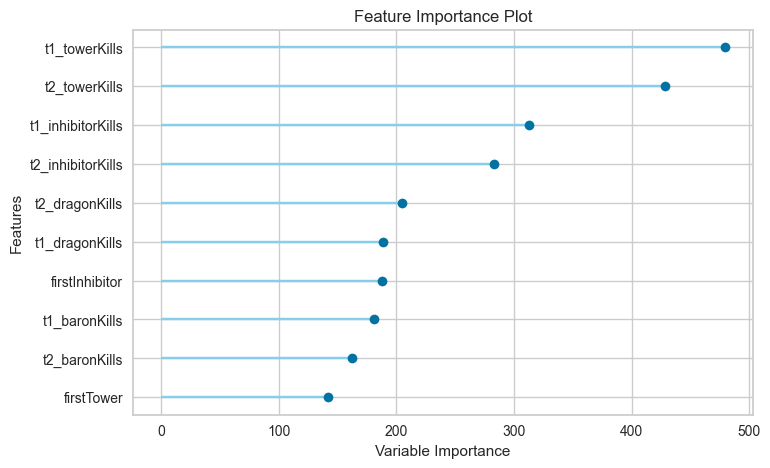

In [21]:
plot_model(best_model,plot="feature")
#sütunların ne kadar etkili olduğunu gösteren grafik

In [33]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4609, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [23]:
import pickle
#modeli pickle olarak kaydetmek için

In [26]:
pickle.dump(best_model,open("lol.pkl","wb"))
#modeli seç ve aç, maas diye kaydet, wb(write=yaz)

In [27]:
yenimodel=pickle.load(open("lol.pkl","rb"))
#modeli yükle ve aç, maas adlı model, rb(read=oku)

In [22]:
df.head()

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1
1,1,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0
2,1,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0
3,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0
4,1,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0


In [40]:
yenimodel.predict([[1,2,2,2,2,2,40,0,0,4,5,50,11,4,0,5]])
#yeni modelde sırayla sütunları girip fiyat'i tahmin ettiriyoruz
#0= 1. takım
#1= 2. takım

array([1], dtype=int64)